In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from joblib import dump, load
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('17-18.csv')
df.head()

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,STL,BLK,BLKA,PF,PFD,PTD,Year,Conference,Playoffs,Championship
0,270,Houston Rockets,82,65,17,0.793,48.2,112.4,38.7,84.2,...,8.5,4.8,4.4,19.5,20.4,8.5,2017,Western,1,0
1,271,Toronto Raptors,82,59,23,0.720,48.4,111.7,41.3,87.4,...,7.6,6.1,4.9,21.7,19.9,7.8,2017,Eastern,1,0
2,272,Golden State Warriors,82,58,24,0.707,48.1,113.5,42.8,85.1,...,8.0,7.5,3.7,19.6,18.5,6.0,2017,Western,1,1
3,273,Boston Celtics,82,55,27,0.671,48.3,104.0,38.3,85.1,...,7.4,4.5,4.4,19.7,19.2,3.6,2017,Eastern,1,0
4,274,Philadelphia 76ers,82,52,30,0.634,48.2,109.8,40.8,86.6,...,8.3,5.1,5.1,22.1,20.4,4.5,2017,Eastern,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    30 non-null     int64  
 1   TEAM          30 non-null     object 
 2   GP            30 non-null     int64  
 3   W             30 non-null     int64  
 4   L             30 non-null     int64  
 5   WIN%          30 non-null     float64
 6   MIN           30 non-null     float64
 7   PTS           30 non-null     float64
 8   FGM           30 non-null     float64
 9   FGA           30 non-null     float64
 10  FG%           30 non-null     float64
 11  3PM           30 non-null     float64
 12  3PA           30 non-null     float64
 13  3P%           30 non-null     float64
 14  FTM           30 non-null     float64
 15  FTA           30 non-null     float64
 16  FT%           30 non-null     float64
 17  OREB          30 non-null     float64
 18  DREB          30 non-null     fl

## EDA

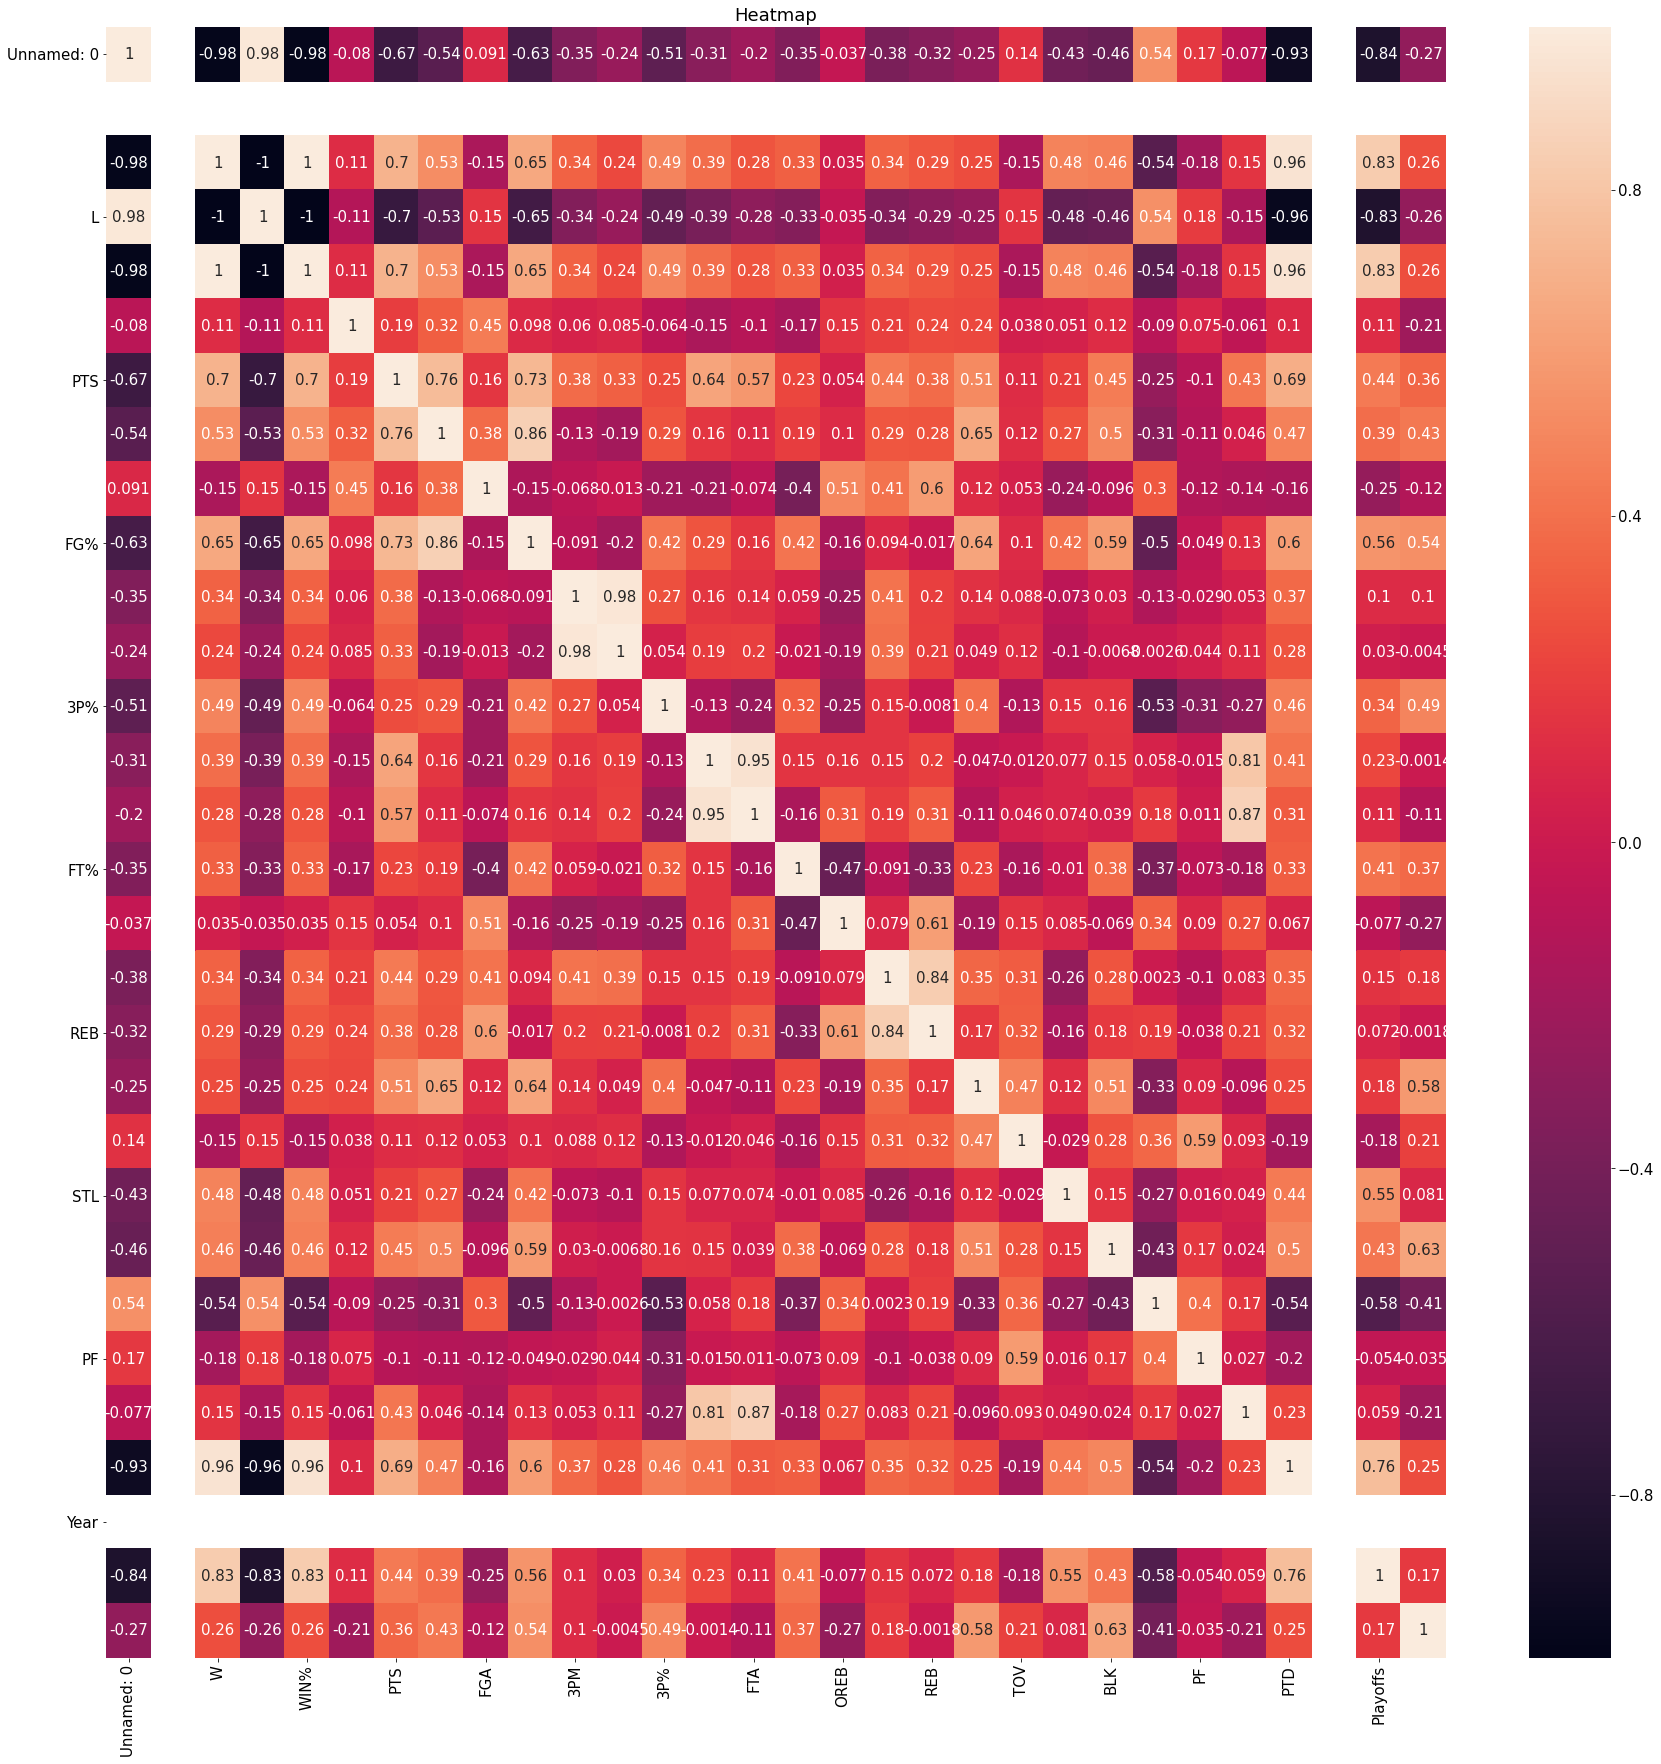

In [5]:
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap')
plt.rcParams.update({'font.size': 15})
fig = plt.gcf()
fig.set_size_inches(30, 30)
plt.show()

## Random Forest Regression

In [6]:
target_column = 'WIN%'
feature_columns = ['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
                   'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD']
y = df[target_column]
X = df[feature_columns]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size = 10/30)

In [7]:
start = time.time()
print('start')
print()
rfr_param_grid = {'n_estimators':[10,50,100,200,500], 'max_depth': [1,2,3,4,5,6]}
rfr = RandomForestRegressor(random_state=0)
grid_rfr = GridSearchCV(rfr, param_grid=rfr_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_rfr.fit(X_train, y_train)
grid_rfr_mse_train = grid_rfr.score(X_train, y_train)
grid_rfr_mse = grid_rfr.score(X_test, y_test)
print('Best Parameters:', grid_rfr.best_params_)
print()
print('Train MSE score for the Random Forest Regression Model with the best parameters above: %.4f' % grid_rfr_mse_train)
print()
print('Test MSE score for the Random Forest Regression Model with the best parameters above: %.4f' % grid_rfr_mse)
print()
print('end')
print()
end = time.time()
print(end - start)

start

Best Parameters: {'max_depth': 5, 'n_estimators': 200}

Train MSE score for the Random Forest Regression Model with the best parameters above: -0.0017

Test MSE score for the Random Forest Regression Model with the best parameters above: -0.0278

end

26.57921814918518


In [8]:
rfr_best_param_model = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)
rfr_best_param_model.fit(X_train, y_train)
rfr_best_param_model_predictions = rfr_best_param_model.predict(X_test)
print('Mean Squared Error with the Best Parameters From Above:', mean_squared_error(y_true=y_test,y_pred=rfr_best_param_model_predictions))

Mean Squared Error with the Best Parameters From Above: 0.02777955839739691


In [9]:
df_feature_importances = pd.DataFrame(rfr_best_param_model.feature_importances_, 
                                      index = X_train.columns, 
                                      columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
df_feature_importances

,index,Importance
0,3P%,0.197745
1,PTS,0.152642
2,3PM,0.142824
3,3PA,0.084234
4,FT%,0.080984
5,STL,0.052445
6,FG%,0.050796
7,PFD,0.046454
8,FGM,0.044158
9,FTA,0.025882


In [10]:
dump(rfr_best_param_model,filename='2017-2018 Random Forest Regressor.joblib')

['2017-2018 Random Forest Regressor.joblib']